### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import io
from scipy import stats
import pickle

### User Options

In [2]:
# load_folder='' #Folder where results are (for loading them)
load_folder='/home/jglaser/Files/Neural_Decoding/Results/'
# fig_folder='' #Folder to save the figures to
fig_folder='/home/jglaser/Figs/Decoding/' 
datasets=['m1','s1','hc'] #Names of the datasets
ill=1 #Whether I am making these plots for exporting to adobe illustrator (in which case I remove the text)
colors=['purple', 'blue','cyan','mediumaquamarine','green','yellowgreen','gold','orange', 'magenta', 'red','gray'] #Colors to plot each method

### Plot Summary (Fig. 4)

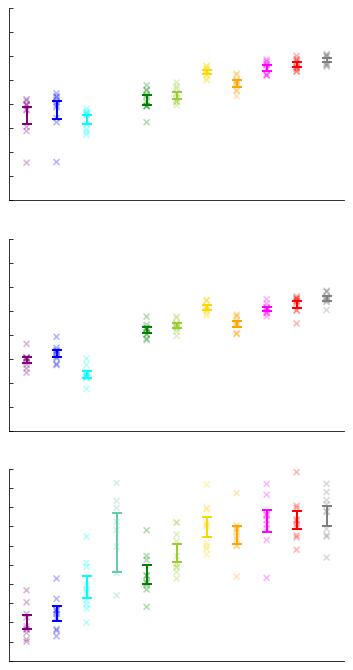

In [3]:
d=0 #Initialize index of the dataset I'm looking at (this will be the row I plot in the figure)
fig, ax = plt.subplots(3,1,figsize=(6,12)) #Create figure (3 rows by 1 column)

for dataset in datasets: #Loop through datasets
    
    ####LOAD RESULTS FOR ALL METHODS####
    
    with open(load_folder+dataset+'_results_kf2.pickle','rb') as f:
                [mean_r2_kf,y_pred_kf_all,y_valid_pred_kf_all,y_train_pred_kf_all,
                                 y_kf_test_all,y_kf_valid_all,y_kf_train_all]=pickle.load(f)
            
    with open(load_folder+dataset+'_results_nb3.pickle','rb') as f:
        [mean_r2_nb,y_pred_nb_all]=pickle.load(f)
        
    with open(load_folder+dataset+'_results_wf2.pickle','rb') as f:
        [mean_r2_wf,y_pred_wf_all,y_train_pred_wf_all,y_valid_pred_wf_all]=pickle.load(f)

    with open(load_folder+dataset+'_results_wc2.pickle','rb') as f:
        [mean_r2_wc,y_pred_wc_all,y_train_pred_wc_all,y_valid_pred_wc_all]=pickle.load(f)    

    with open(load_folder+dataset+'_results_svr2.pickle','rb') as f:
        [mean_r2_svr,y_pred_svr_all,y_train_pred_svr_all,y_valid_pred_svr_all,time_elapsed]=pickle.load(f)
        
    with open(load_folder+dataset+'_results_xgb2.pickle','rb') as f:
        [mean_r2_xgb,y_pred_xgb_all,y_train_pred_xgb_all,y_valid_pred_xgb_all,time_elapsed]=pickle.load(f)

    with open(load_folder+dataset+'_results_dnn2.pickle','rb') as f:
        [mean_r2_dnn,y_pred_dnn_all,y_train_pred_dnn_all,y_valid_pred_dnn_all,time_elapsed]=pickle.load(f)    

    with open(load_folder+dataset+'_results_rnn2.pickle','rb') as f:
        [mean_r2_rnn,y_pred_rnn_all,y_train_pred_rnn_all,y_valid_pred_rnn_all,time_elapsed]=pickle.load(f)

    with open(load_folder+dataset+'_results_gru2.pickle','rb') as f:
            [mean_r2_gru,y_pred_gru_all,y_train_pred_gru_all,y_valid_pred_gru_all,time_elapsed]=pickle.load(f)

    with open(load_folder+dataset+'_results_lstm2.pickle','rb') as f:
        [mean_r2_lstm,y_pred_lstm_all,y_train_pred_lstm_all,y_valid_pred_lstm_all,time_elapsed]=pickle.load(f)

    with open(load_folder+dataset+'_results_ensemble_dnn2.pickle','rb') as f:
        [mean_r2_ensemble,y_pred_ensemble_all]=pickle.load(f)    
    
    
    
    #### Calculate the mean and standard error across cross-validation folds ####
    
    n=mean_r2_wf.shape[0] #Number of folds
    means=([np.mean(mean_r2_wf),np.mean(mean_r2_wc), np.mean(mean_r2_kf), np.mean(mean_r2_nb), np.mean(mean_r2_svr),np.mean(mean_r2_xgb),np.mean(mean_r2_dnn),np.mean(mean_r2_rnn),np.mean(mean_r2_gru),np.mean(mean_r2_lstm),np.mean(mean_r2_ensemble)])
    err=([np.std(mean_r2_wf)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_wc)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_kf)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_nb)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_svr)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_xgb)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_dnn)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_rnn)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_gru)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_lstm)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_ensemble)*np.sqrt(1./n+1./(n-1))])
    #Note that the standard errors shown are more conservative than using 1/sqrt(n), since the training sets used
    #are not independent. See http://www.iro.umontreal.ca/~lisa/bib/pub_subject/language/pointeurs/nadeau_MLJ1597.pdf
      
    
    #####PLOT RESULTS######

    #Plot error bars
    ind = np.arange(len(err)) #X values for plotting
    for pos, y, yerr, color in zip(ind, means, err, colors): #Loop through methods and plot error bars
        ax[d].errorbar(pos, y, yerr, lw=2, capsize=5, capthick=2, color=color)
    
    #Remove x tick labels
    labels = [item.get_text() for item in ax[d].get_xticklabels()]
    empty_string_labels = ['']*len(labels)
    ax[d].set_xticklabels(empty_string_labels)

    #Remove right and top boundaries, and make ticks inward
    ax[d].tick_params(direction='in',bottom=0)
    ax[d].spines['right'].set_color('none')
    ax[d].spines['top'].set_color('none')

    #Plot individual R2 values for each fold as an 'x'
    scatter_x=np.reshape(np.transpose(np.ones((10,1))*range(11)),(110,1)) #Get x values for plotting (first 10 will have an x value of 0, second 10 will have an x value of 1, etc)
    scatter_y=np.concatenate((mean_r2_wf,mean_r2_wc,mean_r2_kf,mean_r2_nb,mean_r2_svr,mean_r2_xgb,mean_r2_dnn,mean_r2_rnn,mean_r2_gru,mean_r2_lstm,mean_r2_ensemble),axis=0) #Y values for plotting
    colors_list=[] #Create a list of the colors that should be used when plotting each 'x'
    for i in scatter_x.astype(np.int).reshape((1,-1))[0]:
        colors_list.append(colors[i])
    ax[d].scatter(scatter_x,scatter_y,c=colors_list,marker='x',alpha=0.3)

    #Set y axis limits and ticks
    if dataset=='hc':
        ax[d].set_ylim([.25, .75])
        ax[d].set_yticks(np.arange(.25,.751,.05))
    else:
        ax[d].set_ylim([.6, 1])
    if ill:
        ax[d].set_yticklabels('')

    d=d+1 #Increase dataset index (so the next dataset gets plot on the next row)
    
plt.show()

fig.savefig(fig_folder+'all_summary_v3.eps') #Save figure


### Plot Traces (Fig. 3)

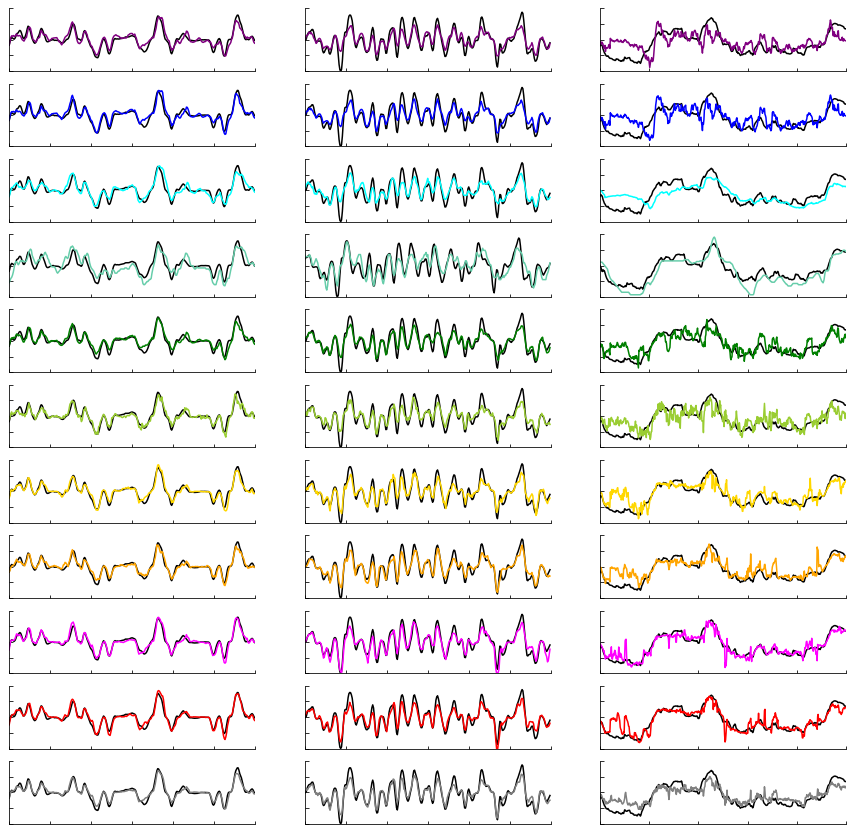

In [4]:
#Set times to plot
ts_sm=np.arange(500,800) #Plot samples 500-800
ts_h=np.arange(500,1000) #Plot samples 500-1000

fig_traces, ax = plt.subplots(11,3,figsize=(15,15)) #Create figure (11 rows by 3 columns)
d=0 #Initialize index of the dataset I'm looking at (this will be the column I plot in the figure)

for dataset in datasets: #Loop through datasets

    
    ####LOAD RESULTS FOR ALL METHODS###
    
    with open(load_folder+dataset+'_results_kf2.pickle','rb') as f:
                [mean_r2_kf,y_pred_kf_all,y_valid_pred_kf_all,y_train_pred_kf_all,
                                 y_kf_test_all,y_kf_valid_all,y_kf_train_all]=pickle.load(f)

    with open(load_folder+dataset+'_results_nb3.pickle','rb') as f:
        [mean_r2_nb,y_pred_nb_all]=pickle.load(f)        
            
    with open(load_folder+dataset+'_results_wf2.pickle','rb') as f:
        [mean_r2_wf,y_pred_wf_all,y_train_pred_wf_all,y_valid_pred_wf_all]=pickle.load(f)

    with open(load_folder+dataset+'_results_wc2.pickle','rb') as f:
        [mean_r2_wc,y_pred_wc_all,y_train_pred_wc_all,y_valid_pred_wc_all]=pickle.load(f)    

    with open(load_folder+dataset+'_results_xgb2.pickle','rb') as f:
        [mean_r2_xgb,y_pred_xgb_all,y_train_pred_xgb_all,y_valid_pred_xgb_all,time_elapsed]=pickle.load(f)

    with open(load_folder+dataset+'_results_svr2.pickle','rb') as f:
        [mean_r2_svr,y_pred_svr_all,y_train_pred_svr_all,y_valid_pred_svr_all,time_elapsed]=pickle.load(f)

    with open(load_folder+dataset+'_results_dnn2.pickle','rb') as f:
        [mean_r2_dnn,y_pred_dnn_all,y_train_pred_dnn_all,y_valid_pred_dnn_all,time_elapsed]=pickle.load(f)    

    with open(load_folder+dataset+'_results_rnn2.pickle','rb') as f:
        [mean_r2_rnn,y_pred_rnn_all,y_train_pred_rnn_all,y_valid_pred_rnn_all,time_elapsed]=pickle.load(f)

    with open(load_folder+dataset+'_results_gru2.pickle','rb') as f:
            [mean_r2_gru,y_pred_gru_all,y_train_pred_gru_all,y_valid_pred_gru_all,time_elapsed]=pickle.load(f)

    with open(load_folder+dataset+'_results_lstm2.pickle','rb') as f:
        [mean_r2_lstm,y_pred_lstm_all,y_train_pred_lstm_all,y_valid_pred_lstm_all,time_elapsed]=pickle.load(f)

    with open(load_folder+dataset+'_results_ensemble_dnn2.pickle','rb') as f:
        [mean_r2_ensemble,y_pred_ensemble_all]=pickle.load(f)  
    
    #Load ground truth data (note that the ground truth data for KF was saved in that results file)
    
    with open(load_folder+dataset+'_ground_truth.pickle','rb') as f:
        [y_test_all,y_train_all,y_valid_all]=pickle.load(f)

    with open(load_folder+dataset+'_ground_truth_nb.pickle','rb') as f: 
        [y_test_all_nb,y_train_all_nb,y_valid_all_nb]=pickle.load(f)
    
    #### PLOT RESULTS ####
    
    m=0 #Initialize method number. This corresponds to the row we're currently plotting in.
    
    #Set times to plot for the current dataset
    if d==2:
        ts=np.copy(ts_h)
    else:
        ts=np.copy(ts_sm)
    t_len=ts.shape[0]
    
    #I only commented Wiener filter in detail below (so look at that if confused)
    
    #WF
    ax[m,d].plot(y_test_all[1][ts,0],'k') #Plot actual
    ax[m,d].plot(y_pred_wf_all[1][ts,0],colors[m]) #Plot predictions, in color specified in user options section
    ax[m,d].tick_params(direction='in') #Make ticks inward
    #Set y limit and ticks
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))
    ax[m,d].set_xlim([0,t_len]) #Set x limit
    ax[m,d].spines['right'].set_color('none') #Remove right boundary
    ax[m,d].spines['top'].set_color('none') #Remove top boundary
    #If plotting for illustrator, remove text
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1 #Increase method index, so the next method gets plotted on the next row

    
    #WC
    ax[m,d].plot(y_test_all[1][ts,0],'k')
    ax[m,d].plot(y_pred_wc_all[1][ts,0],colors[m])
    ax[m,d].tick_params(direction='in')
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))       
    ax[m,d].set_xlim([0,t_len])
    ax[m,d].spines['right'].set_color('none')
    ax[m,d].spines['top'].set_color('none')
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1

    
    #KF
    
    #There is slightly different time indexing for the Kalman filter, so we need to adjust for the offset
    #This is a result of different buffering of the training/testing/validation sets, along with lags in the kalman filter
    #The time index differences below are for the lags used for the CV fold we are plotting.
    if dataset=='m1':
        kf_time_diff=11
    if dataset=='s1':
        kf_time_diff=5
    if dataset=='hc':
        kf_time_diff=4
    
    ax[m,d].plot(y_test_all[1][ts,0],'k')
    if dataset=='hc':
        ax[m,d].plot(y_pred_kf_all[1][ts+kf_time_diff,0],colors[m]) #Adjust for different time index
    else:
        ax[m,d].plot(y_pred_kf_all[1][ts+kf_time_diff,2],colors[m])    
    ax[m,d].tick_params(direction='in')
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))
    ax[m,d].set_xlim([0,t_len])
    ax[m,d].spines['right'].set_color('none')
    ax[m,d].spines['top'].set_color('none')
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1    
    
    #NB
    nb_time_diff=len(y_test_all_nb[1])-len(y_test_all[1]) #There is slightly different time indexing for the Naive Bayes decoder, so we need to adjust for the offset   
    mu=np.mean(y_train_all_nb[1],axis=0) #For the NB decoder, we never zero-centered the data (subtracted out the mean), so we need to do that for plotting
    ax[m,d].plot(y_test_all_nb[1][ts+nb_time_diff,0]-mu[0],'k')
    ax[m,d].plot(y_pred_nb_all[1][ts+nb_time_diff,0]-mu[0],colors[m])
    ax[m,d].tick_params(direction='in')
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))       
    ax[m,d].set_xlim([0,t_len])
    ax[m,d].spines['right'].set_color('none')
    ax[m,d].spines['top'].set_color('none')
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1
    
    
    #SVR
    #For SVR, we fit the model to z-scored y values.
    #So to put them back into their original units, we need to multiply by the standard deviation of the original training data
    stdev=np.std(y_train_all[1])
    ax[m,d].plot(y_test_all[1][ts,0],'k')
    ax[m,d].plot(y_pred_svr_all[1][ts,0]*stdev,colors[m])
    ax[m,d].tick_params(direction='in')
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))      
    ax[m,d].set_xlim([0,t_len])
    ax[m,d].spines['right'].set_color('none')
    ax[m,d].spines['top'].set_color('none')
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1    
    
    #XGB
    ax[m,d].plot(y_test_all[1][ts,0],'k')
    ax[m,d].plot(y_pred_xgb_all[1][ts,0],colors[m])
    ax[m,d].tick_params(direction='in')
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))      
    ax[m,d].set_xlim([0,t_len])
    ax[m,d].spines['right'].set_color('none')
    ax[m,d].spines['top'].set_color('none')
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1    

    #DNN
    ax[m,d].plot(y_test_all[1][ts,0],'k')
    ax[m,d].plot(y_pred_dnn_all[1][ts,0],colors[m])
    ax[m,d].tick_params(direction='in')
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))      
    ax[m,d].set_xlim([0,t_len])
    ax[m,d].spines['right'].set_color('none')
    ax[m,d].spines['top'].set_color('none')
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1 
    
    #RNN
    ax[m,d].plot(y_test_all[1][ts,0],'k')
    ax[m,d].plot(y_pred_rnn_all[1][ts,0],colors[m])
    ax[m,d].tick_params(direction='in')
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))      
    ax[m,d].set_xlim([0,t_len])
    ax[m,d].spines['right'].set_color('none')
    ax[m,d].spines['top'].set_color('none')
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1       

    #GRU
    ax[m,d].plot(y_test_all[1][ts,0],'k')
    ax[m,d].plot(y_pred_gru_all[1][ts,0],colors[m])
    ax[m,d].tick_params(direction='in')
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))      
    ax[m,d].set_xlim([0,t_len])
    ax[m,d].spines['right'].set_color('none')
    ax[m,d].spines['top'].set_color('none')
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1   
    
    #LSTM
    ax[m,d].plot(y_test_all[1][ts,0],'k')
    ax[m,d].plot(y_pred_lstm_all[1][ts,0],colors[m])
    ax[m,d].tick_params(direction='in')
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))      
    ax[m,d].set_xlim([0,t_len])
    ax[m,d].spines['right'].set_color('none')
    ax[m,d].spines['top'].set_color('none')
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1   
    
    #ENSEMBLE
    ax[m,d].plot(y_test_all[1][ts,0],'k')
    #For the ensemble, the output is a list of length 20, rather than 10x2
    ax[m,d].plot(y_pred_ensemble_all[2][ts,0],colors[m]) 
    ax[m,d].tick_params(direction='in')
    if dataset=='hc':
        ax[m,d].set_ylim([-100,100])
        ax[m,d].set_yticks(np.arange(-100,100.1,50))
    else:
        ax[m,d].set_ylim([-30,30])
        ax[m,d].set_yticks(np.arange(-30,30.1,15))      
    ax[m,d].set_xlim([0,t_len])
    ax[m,d].spines['right'].set_color('none')
    ax[m,d].spines['top'].set_color('none')
    if ill:
        ax[m,d].set_xticklabels('')
        ax[m,d].set_yticklabels('')
    m=m+1   
    
    
    d=d+1
    
    
fig_traces.savefig(fig_folder+'all_traces_wnb.eps')    

## Comparing KF Methods (Fig S1)

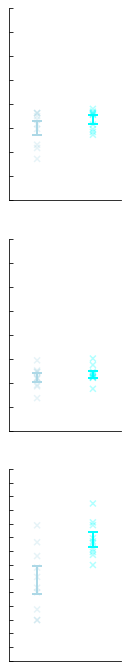

In [5]:
d=0 #Initialize dataset
fig, ax = plt.subplots(3,1,figsize=(2,12)) #Create figure (3 rows x 1 column)

colors=['lightblue','cyan'] #Colors to plot the 2 KF variants

for dataset in datasets: #Loop through datasets

    
    ###LOAD RESULTS###

    with open(load_folder+dataset+'_results_kf0.pickle','rb') as f:
        [mean_r2_kf0,y_pred_kf_all0,y_kf_test_all0]=pickle.load(f)
    
    with open(load_folder+dataset+'_results_kf2.pickle','rb') as f:
                [mean_r2_kf,y_pred_kf_all,y_valid_pred_kf_all,y_train_pred_kf_all,
                                 y_kf_test_all,y_kf_valid_all,y_kf_train_all]=pickle.load(f)
                
    
    #####PLOT RESULTS######

    #### Calculate the mean and standard error across cross-validation folds ####
    
    n=mean_r2_kf.shape[0] #Number of folds
    means=([np.mean(mean_r2_kf0), np.mean(mean_r2_kf)])
    err=([np.std(mean_r2_kf0)*np.sqrt(1./n+1./(n-1)),np.std(mean_r2_kf)*np.sqrt(1./n+1./(n-1))])
    #Note that the standard errors shown are more conservative than using 1/sqrt(n), since the training sets used
    #are not independent. See http://www.iro.umontreal.ca/~lisa/bib/pub_subject/language/pointeurs/nadeau_MLJ1597.pdf
  
    #Plot bars
    ind = np.arange(len(err)) #X values for plotting
    for pos, y, yerr, color in zip(ind, means, err, colors): #Loop through methods and plot error bars
        ax[d].errorbar(pos, y, yerr, lw=2, capsize=5, capthick=2, color=color)
#     width=.95
#     ax[d].bar(ind, means, width, yerr=err, color=colors,alpha=0.7,error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))

    #Remove x tick labels
    labels = [item.get_text() for item in ax[d].get_xticklabels()]
    empty_string_labels = ['']*len(labels)
    ax[d].set_xticklabels(empty_string_labels)

    #Remove right and top boundaries, and make ticks inward
    ax[d].tick_params(direction='in',bottom=0)
    ax[d].spines['right'].set_color('none')
    ax[d].spines['top'].set_color('none')
    
    #Plot individual R2 for each fold
    scatter_x=np.reshape(np.transpose(np.ones((10,1))*range(2)),(20,1)) #Get x values for plotting (first 10 will have an x value of 0, second 10 will have an x value of 1, etc)
    scatter_y=np.concatenate((mean_r2_kf0,mean_r2_kf),axis=0) #Get y values for plotting
    colors_list=[] #Create a list of the colors that should be used when plotting each 'x'
    for i in scatter_x.astype(np.int).reshape((1,-1))[0]:
        colors_list.append(colors[i])
    ax[d].scatter(scatter_x,scatter_y,c=colors_list,marker='x',alpha=0.3)

    #Set y limit and ticks
    if dataset=='hc':
        ax[d].set_ylim([0, .7])
        ax[d].set_yticks(np.arange(0,.701,.05))
    else:
        ax[d].set_ylim([.6, 1])
    if ill:
        ax[d].set_yticklabels('')
    
    ax[d].set_xlim([-0.5, 1.5])
    
    d=d+1 #Update row of next dataset
    
plt.show()
fig.savefig(fig_folder+'kf_summary3.eps')   
